In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
!wget -q $url       # baixa o ZIP
!unzip -q bank.zip  # extrai bank-full.csv e outros

df = pd.read_csv("bank-full.csv", sep=";")
df.head()


replace bank-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: tulip
error:  invalid response [tulip]
replace bank-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace bank-names.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
import tensorflow_datasets as tfds

(ds_train, ds_val, ds_test), info = tfds.load(
    "tf_flowers",
    split=["train[:80%]", "train[80%:90%]", "train[90%:]"],
    as_supervised=True,
    with_info=True,
)
print("Classes:", info.features["label"].names)


Classes: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


In [ ]:
import zipfile
import os
import pandas as pd

# Etapa 1: Upload manual do arquivo ZIP no Colab
# from google.colab import files
# uploaded = files.upload()

# Etapa 2: Extrair o ZIP externo
outer_zip_path = '/content/bank+marketing.zip'
outer_extract_path = '/content/bank_outer'
with zipfile.ZipFile(outer_zip_path, 'r') as outer_zip:
    outer_zip.extractall(outer_extract_path)

# Etapa 3: Extrair o ZIP interno (bank.zip)
inner_zip_path = os.path.join(outer_extract_path, 'bank.zip')
inner_extract_path = '/content/bank_data'
with zipfile.ZipFile(inner_zip_path, 'r') as inner_zip:
    inner_zip.extractall(inner_extract_path)

# Etapa 4: Listar e carregar o CSV principal
print("Arquivos disponíveis:", os.listdir(inner_extract_path))

df = pd.read_csv(os.path.join(inner_extract_path, 'bank.csv'), sep=';')
df.head()

Arquivos disponíveis: ['bank-full.csv', 'bank-names.txt', 'bank.csv']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Converter variáveis binárias para 0/1
df_bin = df.copy()
binary_map = {'yes': 1, 'no': 0}
for col in ['default', 'housing', 'loan', 'y']:
    df_bin[col] = df_bin[col].map(binary_map)

# 2. One-hot encoding nas variáveis categóricas
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df_bin, columns=categorical_cols, drop_first=True)

# 3. Separar X (features) e y (rótulo)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# 4. Padronizar colunas numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Dividir em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3616, 42), (905, 42), (3616,), (905,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Lista de configurações de hiperparâmetros
params_list = [
    {"criterion": "gini", "max_depth": None},
    {"criterion": "entropy", "max_depth": 5},
    {"criterion": "gini", "max_depth": 10, "min_samples_split": 10}
]

# Lista para guardar resultados
results_dt = []

for i, params in enumerate(params_list, 1):
    clf = DecisionTreeClassifier(random_state=42, **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    acc = accuracy_score(y_test, y_pred)

    results_dt.append({
        "Configuração": f"Configuração {i}",
        "Hiperparâmetros": params,
        "Acurácia": acc,
        "Precisão (classe 1)": report['1']['precision'],
        "Recall (classe 1)": report['1']['recall'],
        "F1-score (classe 1)": report['1']['f1-score']
    })

# Mostrar resultados
import pandas as pd
pd.DataFrame(results_dt)


,Configuração,Hiperparâmetros,Acurácia,Precisão (classe 1),Recall (classe 1),F1-score (classe 1)
0,Configuração 1,"{'criterion': 'gini', 'max_depth': None}",0.885083,0.471698,0.510204,0.490196
1,Configuração 2,"{'criterion': 'entropy', 'max_depth': 5}",0.900552,0.551282,0.438776,0.488636
2,Configuração 3,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.904972,0.590909,0.397959,0.475610


from matplotlib import pyplot as plt
_df_20['Acurácia'].plot(kind='hist', bins=20, title='Acurácia')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Precisão (classe 1)'].plot(kind='hist', bins=20, title='Precisão (classe 1)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Recall (classe 1)'].plot(kind='hist', bins=20, title='Recall (classe 1)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['F1-score (classe 1)'].plot(kind='hist', bins=20, title='F1-score (classe 1)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_24.groupby('Configuração').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='Acurácia', y='Precisão (classe 1)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='Precisão (classe 1)', y='Recall (classe 1)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='Recall (classe 1)', y='F1-score (classe 1)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Acurácia']
  ys = series['Recall (classe 1)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('Acurácia', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Configuração')):
  _plot_series(series, series_name, i)
  fig.legend(title='Configuração', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Acurácia')
_ = plt.ylabel('Recall (classe 1)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Acurácia']
  ys = series['F1-score (classe 1)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('Acurácia', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Configuração')):
  _plot_series(series, series_name, i)
  fig.legend(title='Configuração', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Acurácia')
_ = plt.ylabel('F1-score (classe 1)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Acurácia']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Acurácia'}, axis=1)
              .sort_values('Acurácia', ascending=True))
  xs = counted['Acurácia']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('Acurácia', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Configuração')):
  _plot_series(series, series_name, i)
  fig.legend(title='Configuração', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Acurácia')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Precisão (classe 1)']
  ys = series['Recall (classe 1)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('Precisão (classe 1)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Configuração')):
  _plot_series(series, series_name, i)
  fig.legend(title='Configuração', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Precisão (classe 1)')
_ = plt.ylabel('Recall (classe 1)')

from matplotlib import pyplot as plt
_df_32['Acurácia'].plot(kind='line', figsize=(8, 4), title='Acurácia')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Precisão (classe 1)'].plot(kind='line', figsize=(8, 4), title='Precisão (classe 1)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Recall (classe 1)'].plot(kind='line', figsize=(8, 4), title='Recall (classe 1)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['F1-score (classe 1)'].plot(kind='line', figsize=(8, 4), title='F1-score (classe 1)')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['Configuração'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='Acurácia', y='Configuração', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['Configuração'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='Precisão (classe 1)', y='Configuração', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['Configuração'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='Recall (classe 1)', y='Configuração', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['Configuração'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='F1-score (classe 1)', y='Configuração', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
!pip install -q --upgrade datasets "pyarrow<20"  # versões compatíveis

from datasets import load_dataset
b2w = load_dataset("ruanchaves/b2w-reviews01", split="train[:10%]")
print(b2w[0]["review_text"])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64

NotImplementedError: Loading a dataset cached in a LocalFileSystem is not supported.

In [ ]:
from huggingface_hub import list_files_info, hf_hub_download


ImportError: cannot import name 'list_files_info' from 'huggingface_hub' (/usr/local/lib/python3.11/dist-packages/huggingface_hub/__init__.py)

In [ ]:
# Entra no repositório e baixa os arquivos reais do LFS
!git -C /content/b2w-reviews01 lfs pull


In [ ]:
import os
data_path = "/content/b2w-reviews01/data"
print("Conteúdo de", data_path, ":", os.listdir(data_path))


FileNotFoundError: [Errno 2] No such file or directory: '/content/b2w-reviews01/data'

# Task
eu tenho uma base aqui que eu preciso subir para cá e que você consiga fazer a leitura desses dados para fazer um pré-processamento dos dados para depois aplicar os métodos como de árvore de decisão e quem saber uma rede neural, como eu subo?

Here is all the data you need:
"B2W-Reviews01.csv"

## Data loading

### Subtask:
Load the dataset "B2W-Reviews01.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "B2W-Reviews01.csv" into a pandas DataFrame and display basic information about it.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('B2W-Reviews01.csv')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('B2W-Reviews01.csv', encoding='latin-1')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv('B2W-Reviews01.csv', encoding='utf-8')
        except Exception as e:
            print(f"Error loading the file: {e}")
            df = None

if df is not None:
    display(df.head())
    print(df.shape)
    df.info()

<ipython-input-1-dbe645da4e1f>:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('B2W-Reviews01.csv')


,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


(132373, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132071 non-null  object 
 8   overall_rating         132373 non-null  int64  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            129098 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128382 non-null  object 
dtypes: float64(1), int64(1)

## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify data types of each column, check for missing values, and examine the distribution of key variables. Determine the shape of the data and look for potential issues like inconsistencies or irrelevant columns.  Pay special attention to the 'review_comment_title' and 'review_comment_message' columns, as these might contain valuable textual information.


**Reasoning**:
Explore the dataset, identify data types, check for missing values, examine the distribution of key variables, and look for potential issues.  This involves using .shape, .info(), .describe(), examining unique values for categorical columns, calculating text lengths, and checking for duplicates.



In [ ]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a summary of the DataFrame
df.info()

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

# Examine unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values and frequencies for {col}:")
    print(df[col].value_counts())

# Calculate the average length of text in 'review_comment_title' and 'review_comment_message'
# Note: These columns are 'review_title' and 'review_text' in the provided data.
if 'review_title' in df.columns:
    df['review_title_length'] = df['review_title'].astype(str).apply(len)
    print(f"\nAverage length of review_title: {df['review_title_length'].mean()}")
if 'review_text' in df.columns:
    df['review_text_length'] = df['review_text'].astype(str).apply(len)
    print(f"\nAverage length of review_text: {df['review_text_length'].mean()}")

# Check for duplicated rows
duplicated_rows = df.duplicated().sum()
print(f"\nNumber of duplicated rows: {duplicated_rows}")

Shape of the DataFrame: (132373, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132071 non-null  object 
 8   overall_rating         132373 non-null  int64  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            129098 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128382 non-null  object 
dtyp

,overall_rating,reviewer_birth_year
count,132373.000000,126389.000000
mean,3.492004,1977.495898
std,1.530289,21.895265
min,1.000000,59.000000
25%,2.000000,1969.000000
50%,4.000000,1980.000000
75%,5.000000,1987.000000
max,5.000000,2018.000000



Unique values and frequencies for submission_date:
submission_date
2018-05-12 06:35:07    3
2018-05-02 16:54:29    3
2018-01-18 06:53:03    3
2018-05-23 14:59:27    3
2018-05-31 16:31:41    3
                      ..
2018-02-26 15:45:19    1
2018-02-26 15:45:13    1
2018-02-26 15:43:02    1
2018-02-26 15:42:41    1
2018-02-26 15:53:01    1
Name: count, Length: 129927, dtype: int64

Unique values and frequencies for reviewer_id:
reviewer_id
6ca0a1b3fa3b50ffa21e61a01633fd785172ebb04268d1ec97c7c958608902ea    155
1cd7f8704e3ebe899a8ff9b5bc485e787a703a67d0c66fce9c260de58e0340fe     75
2c213316c9638030e623f923e3fee14bf191cbab5777e8f5973cdb612b7675c8     64
363bf7b1a7505732379f7a2ae004ecbdc7194b5b774cd844ceebec9321d016b1     62
e34a8ba82a47141e5b2d7fbb53e8b7a7f4222ee64d27d2d4f5e4bf245a0fd4be     61
                                                                   ... 
e076edaecd6c8afe579e2c7b3f54cf304fef57e101bc43a8be201bbcee0e55b3      1
2ee45c35239c2bd674add920258692a0b09380168386c12ef03

**Reasoning**:
Visualize the distribution of key variables using histograms, box plots, and count plots. Pay special attention to the `overall_rating` column. Check for potential outliers or unusual patterns in numerical and categorical features. Also, visualize the correlation matrix using a heatmap.



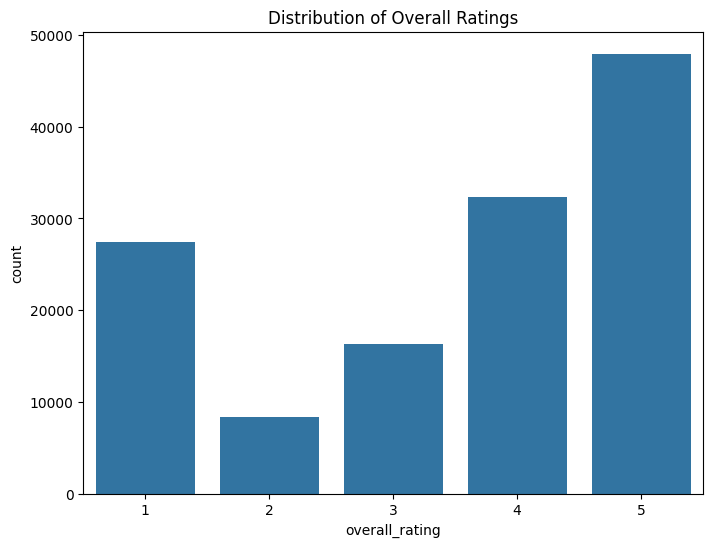

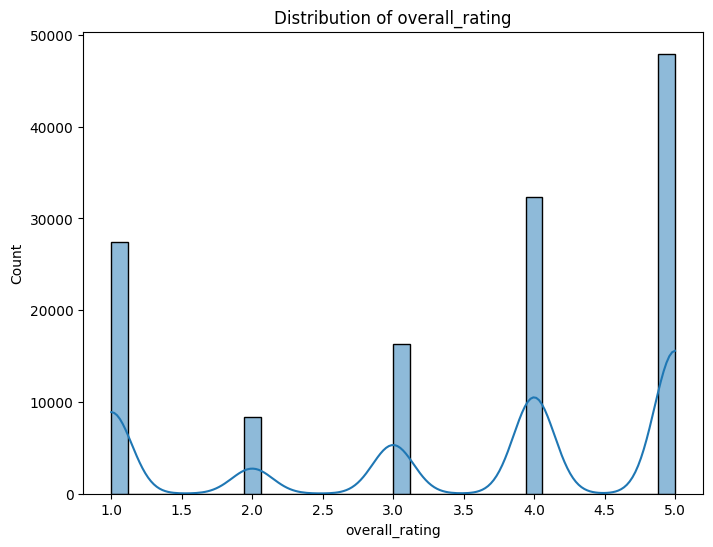

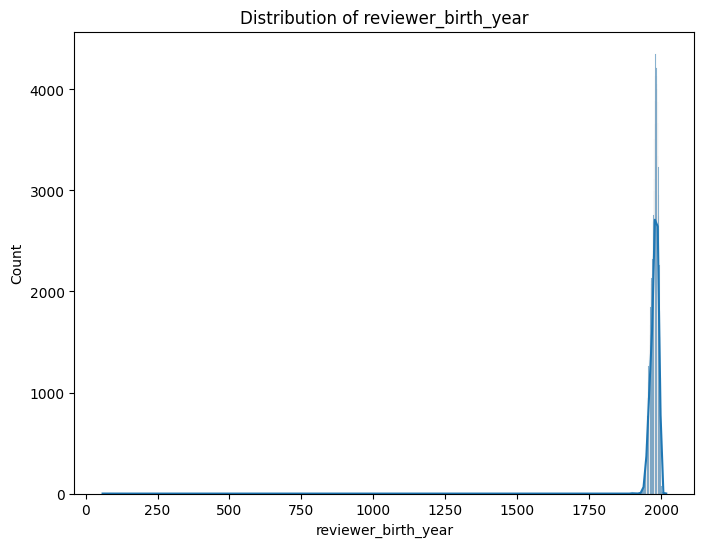

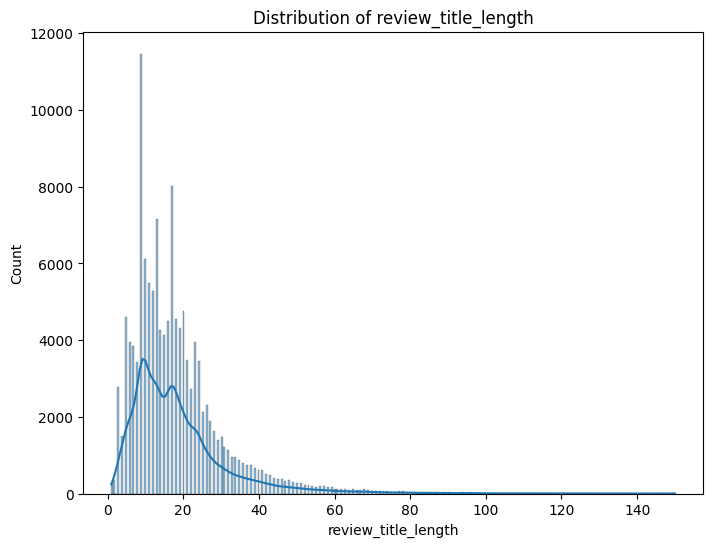

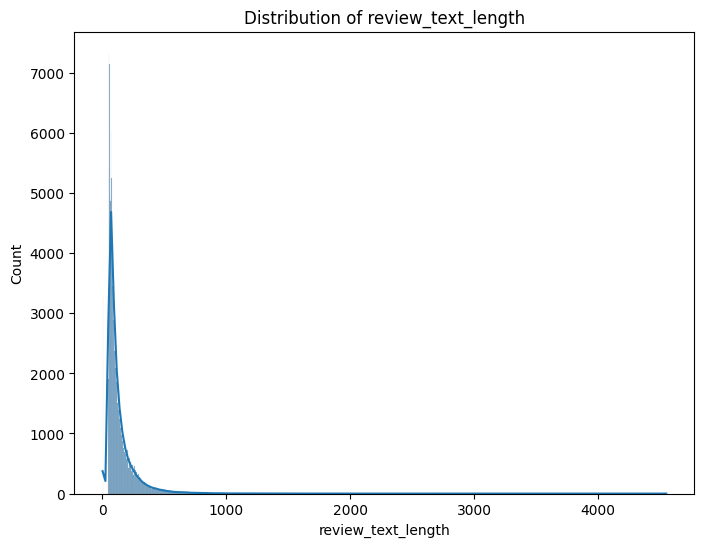

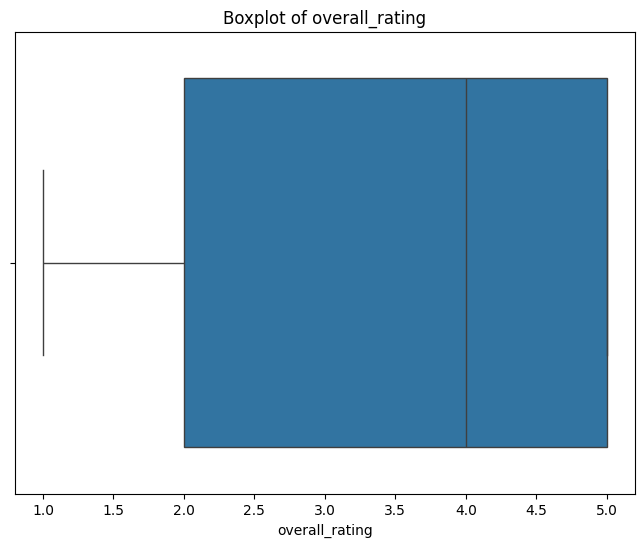

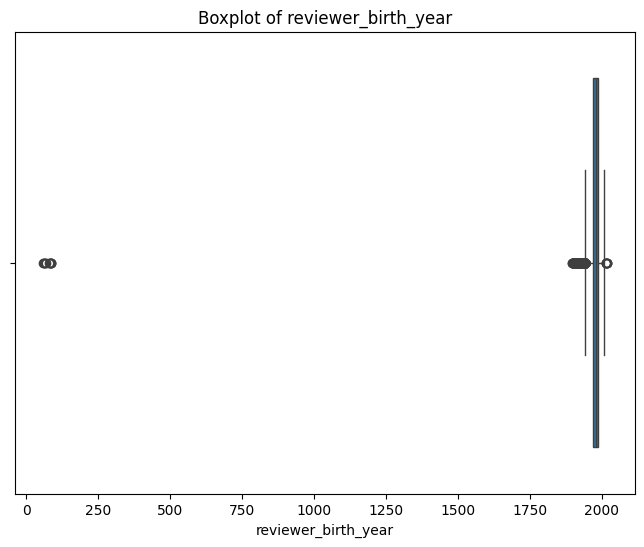

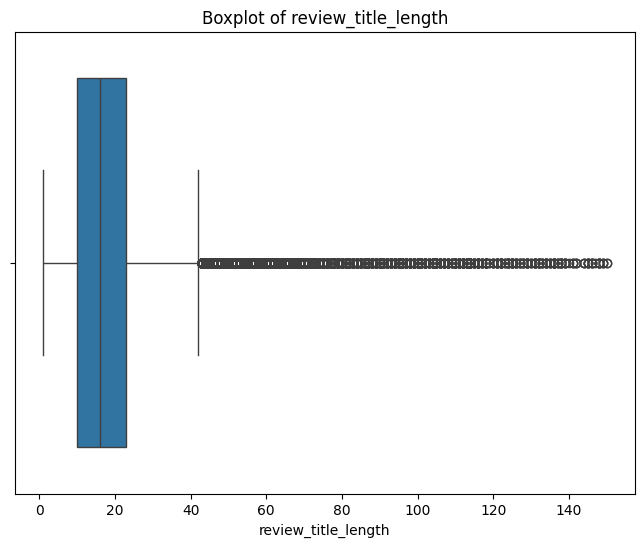

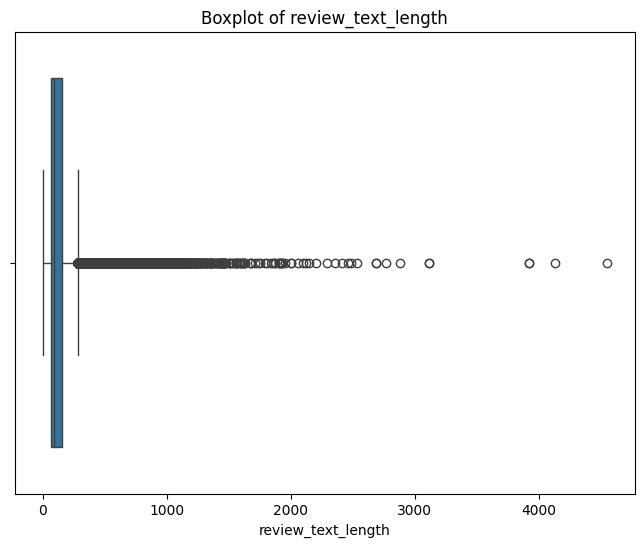

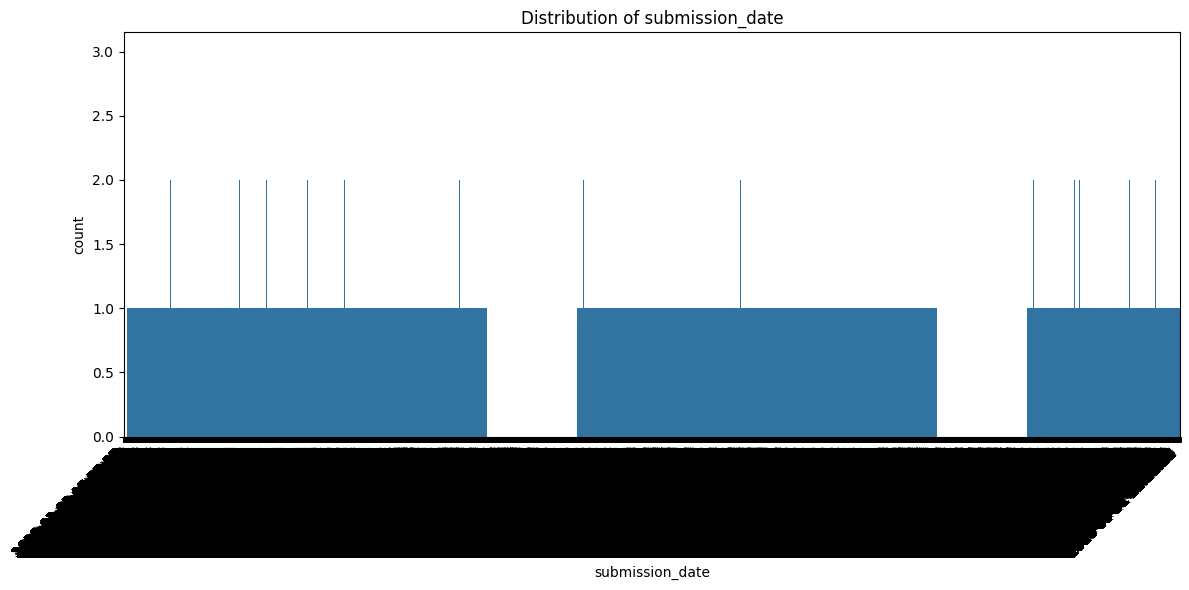

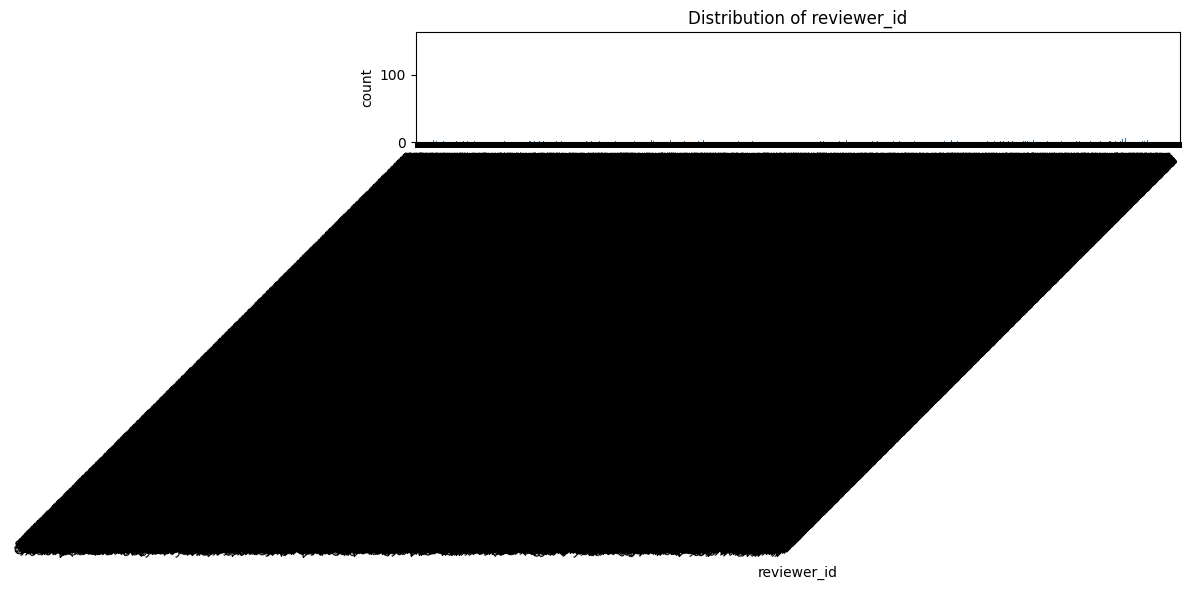

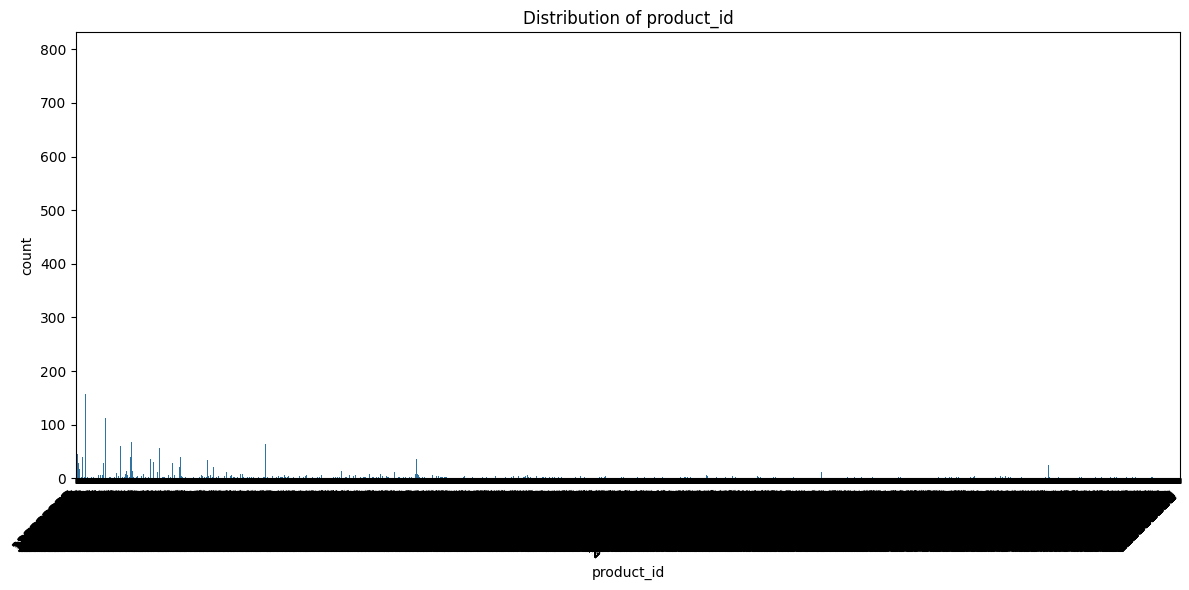

<ipython-input-3-79d3082ff11d>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping


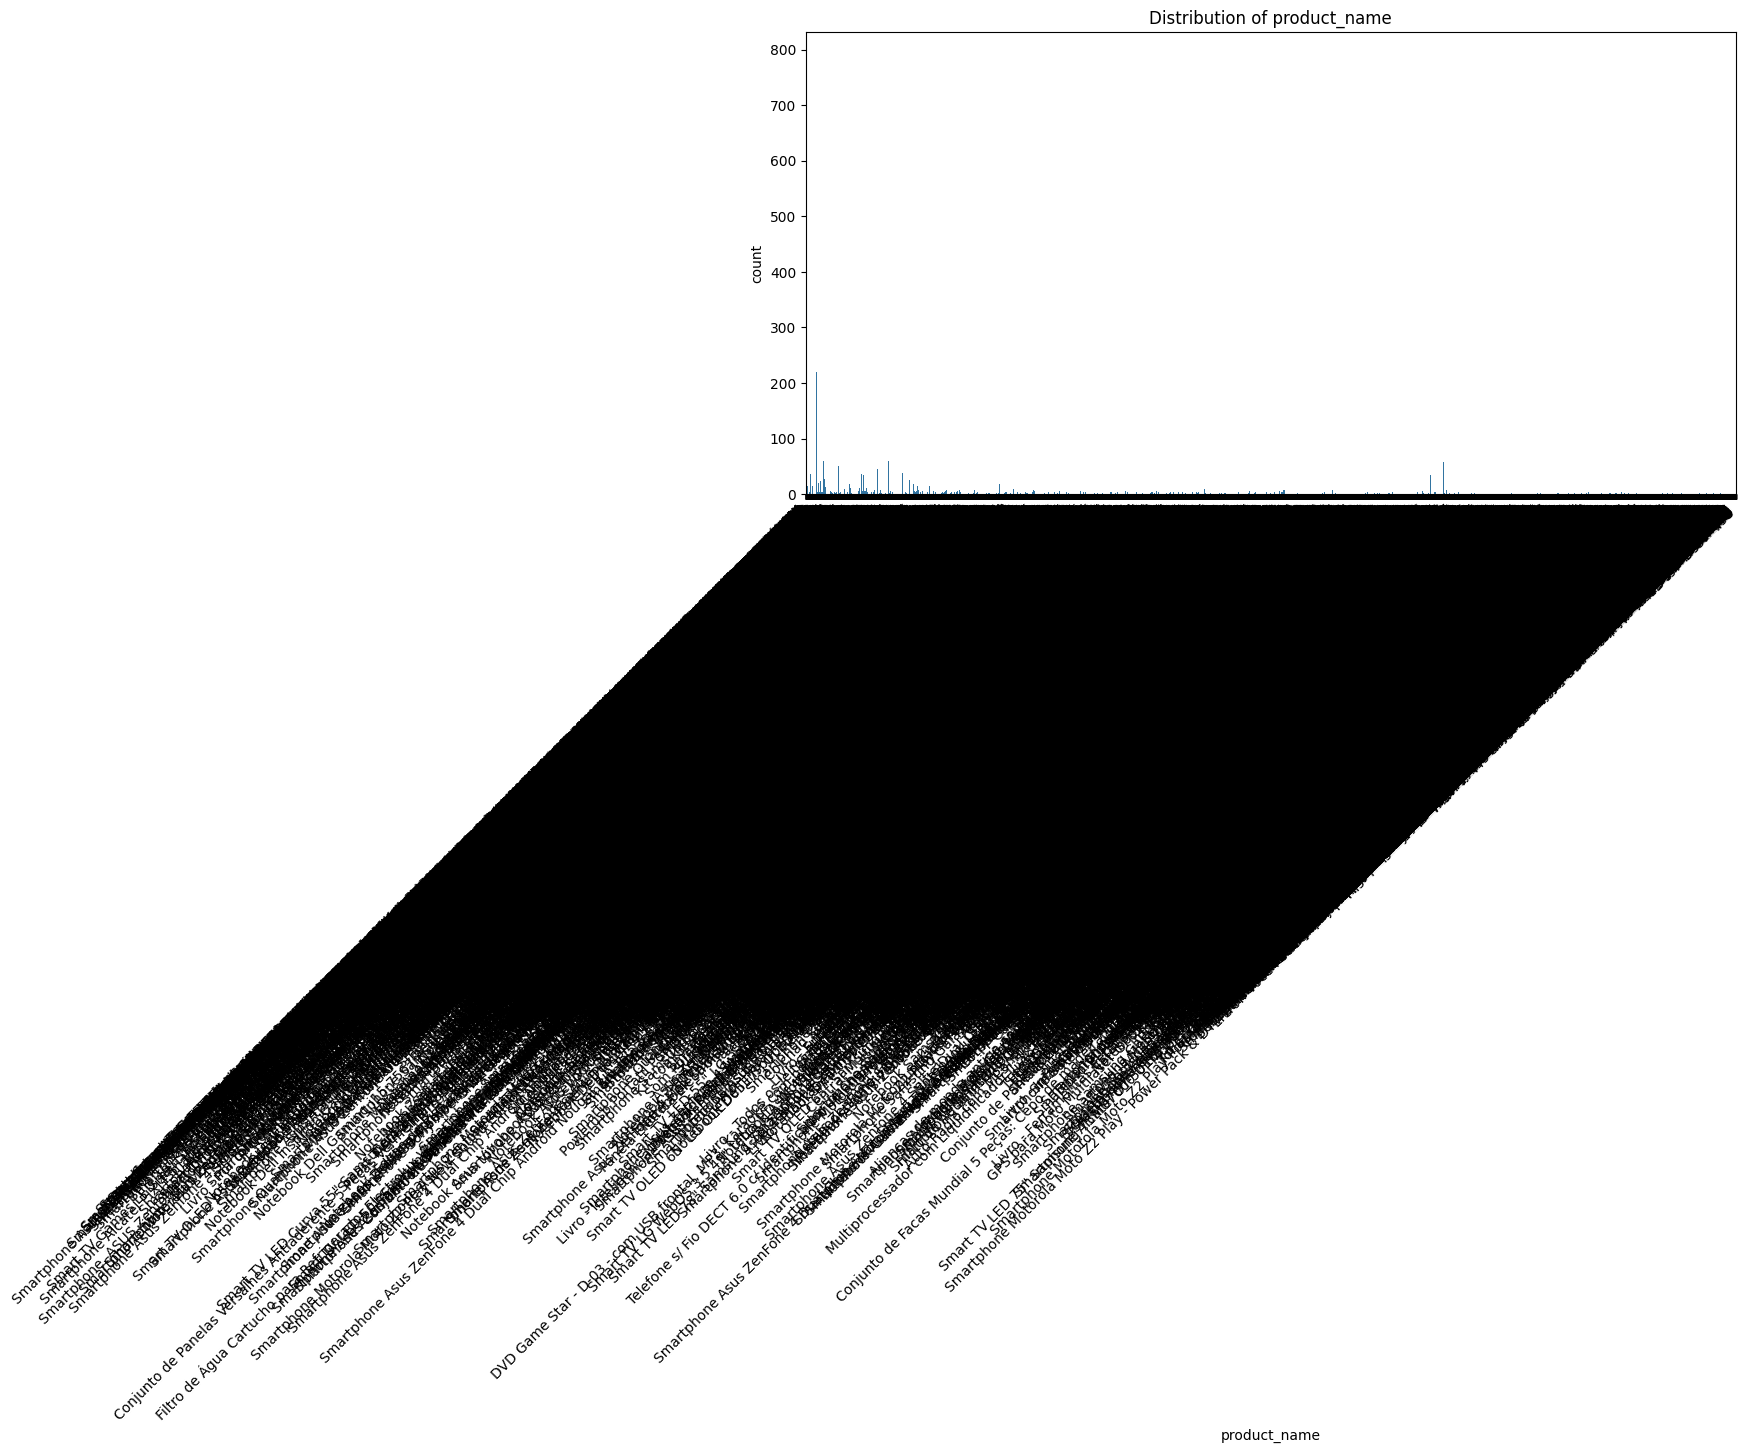

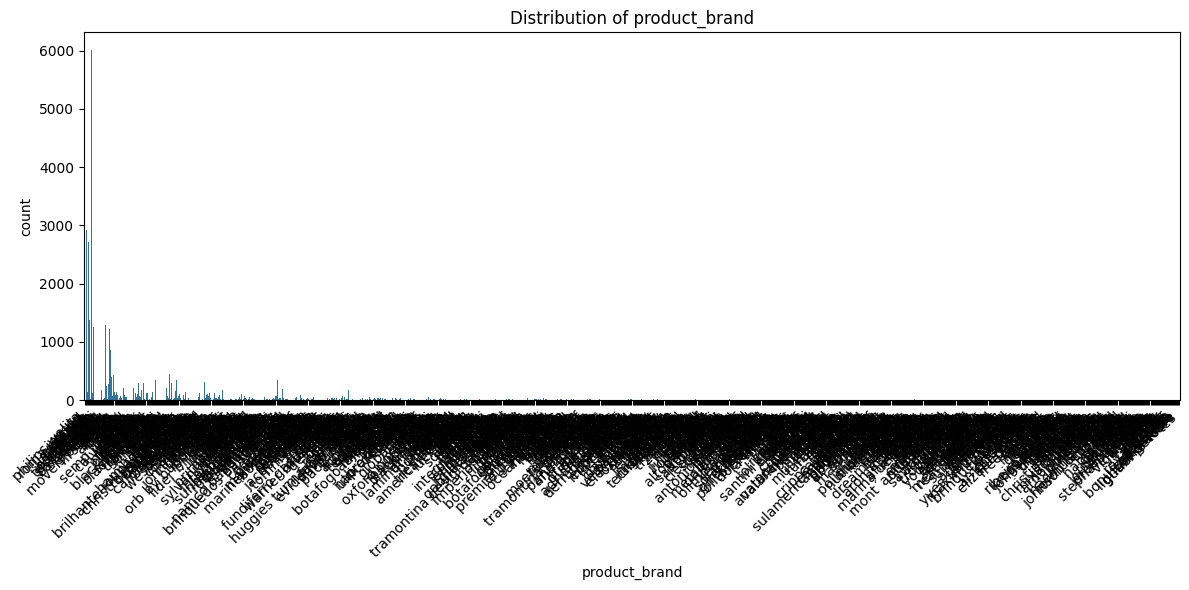

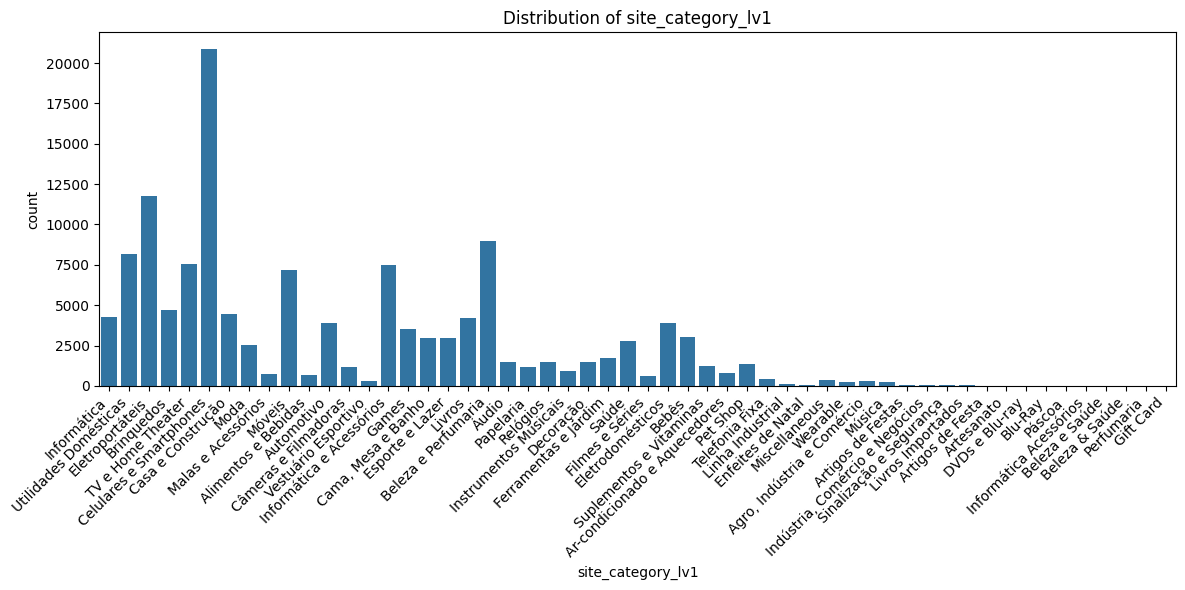

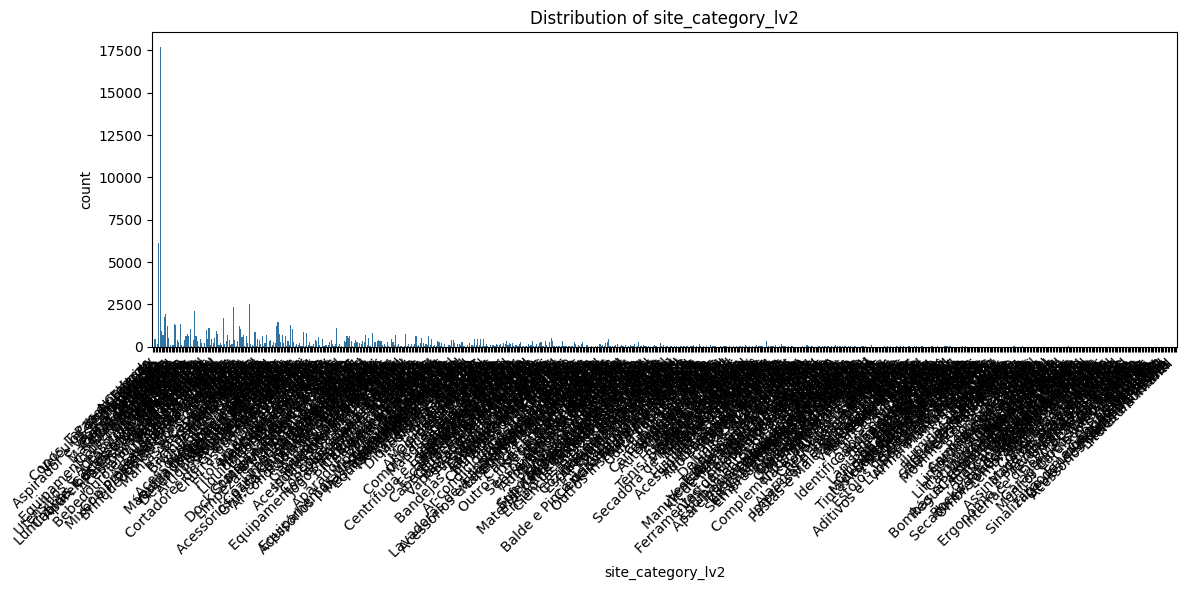

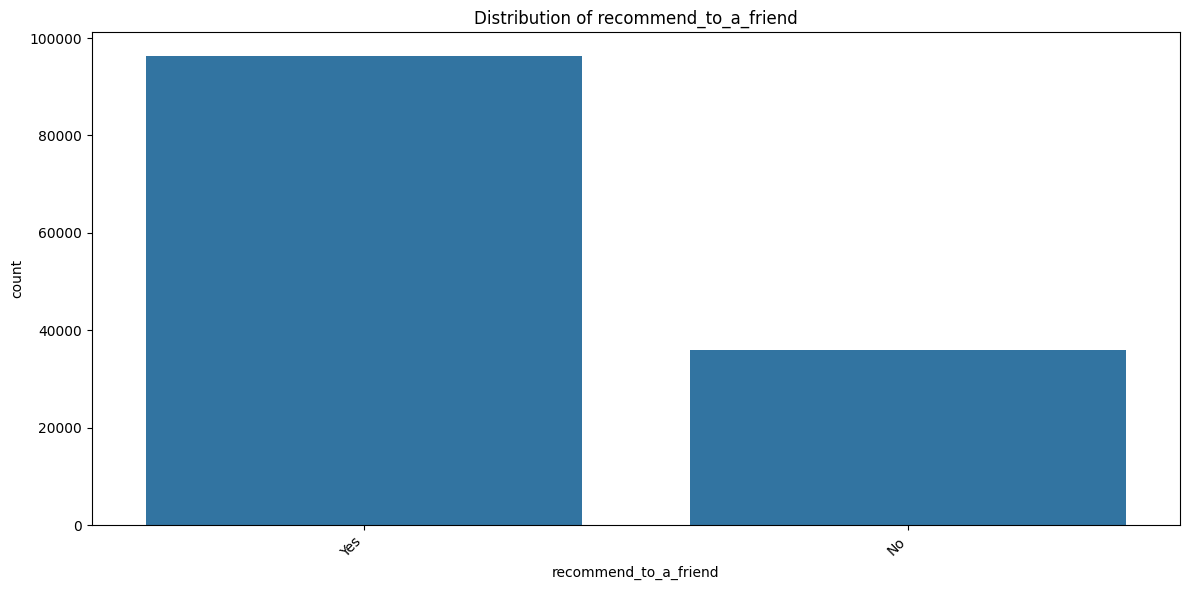

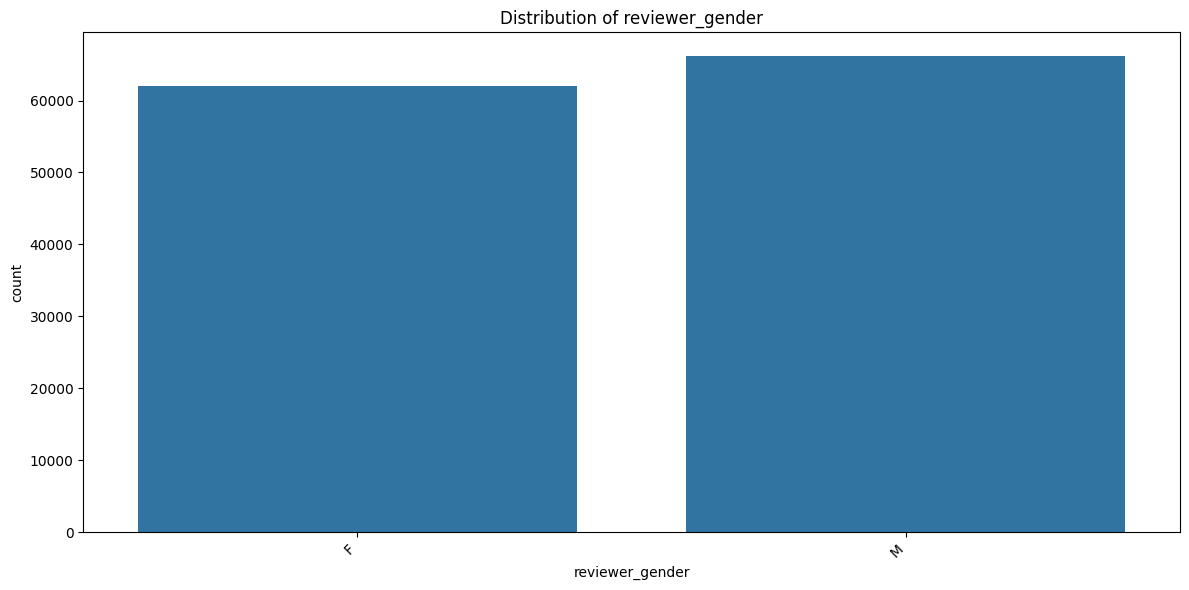

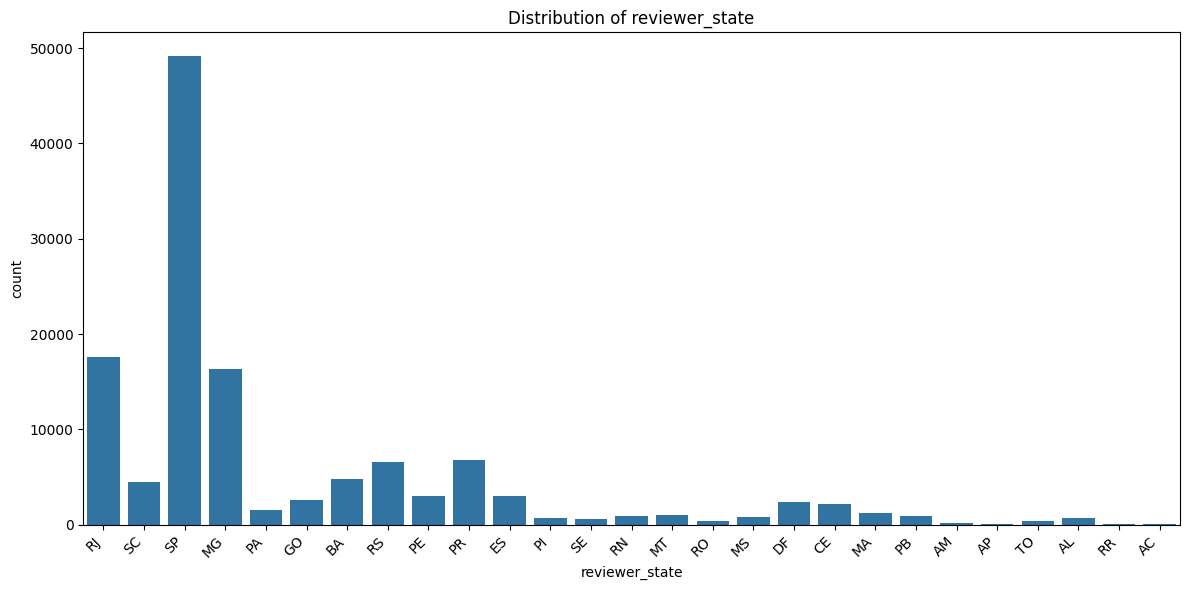

ValueError: could not convert string to float: '2018-01-01 00:11:28'

<Figure size 1200x1000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overall rating distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='overall_rating', data=df)
plt.title('Distribution of Overall Ratings')
plt.show()

# Histograms for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# Box plots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()

# Count plots for categorical features (excluding text columns)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col not in ['review_title', 'review_text']:  # Exclude text columns
        plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()

# Correlation matrix and heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
The previous code block failed due to a `ValueError` when trying to compute the correlation matrix because of a string column ('submission_date').  I need to handle this error by excluding non-numeric columns from the correlation calculation.  I'll also improve the plot sizes and add labels and titles to the plots.



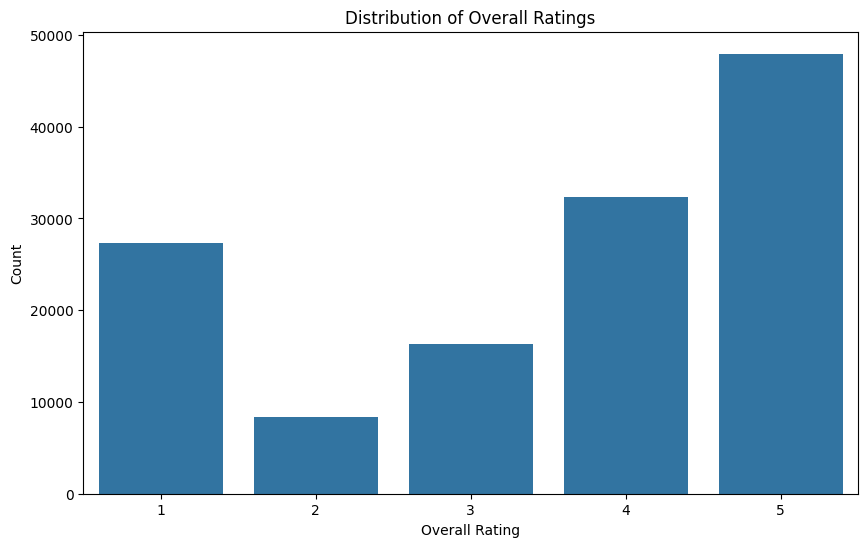

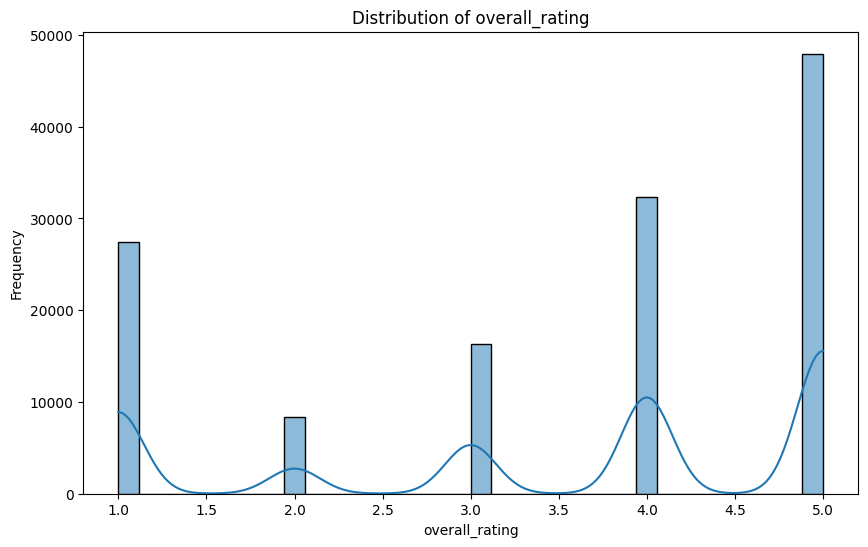

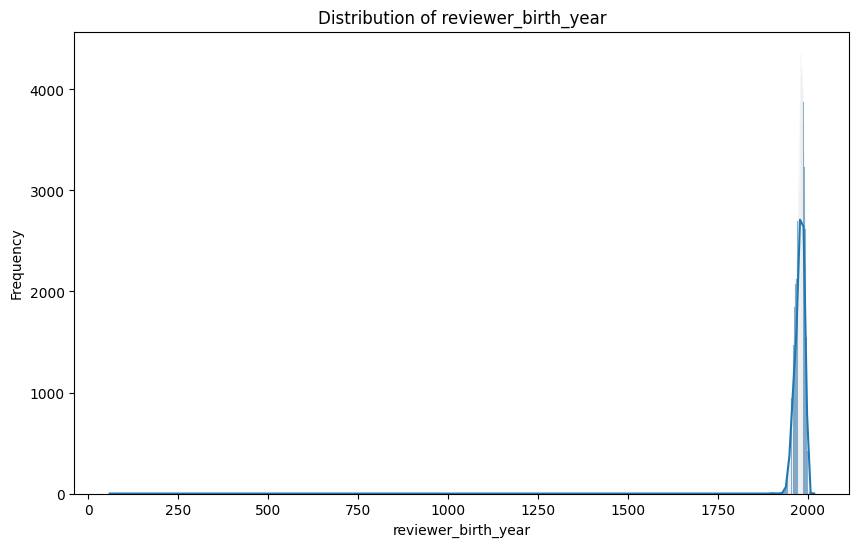

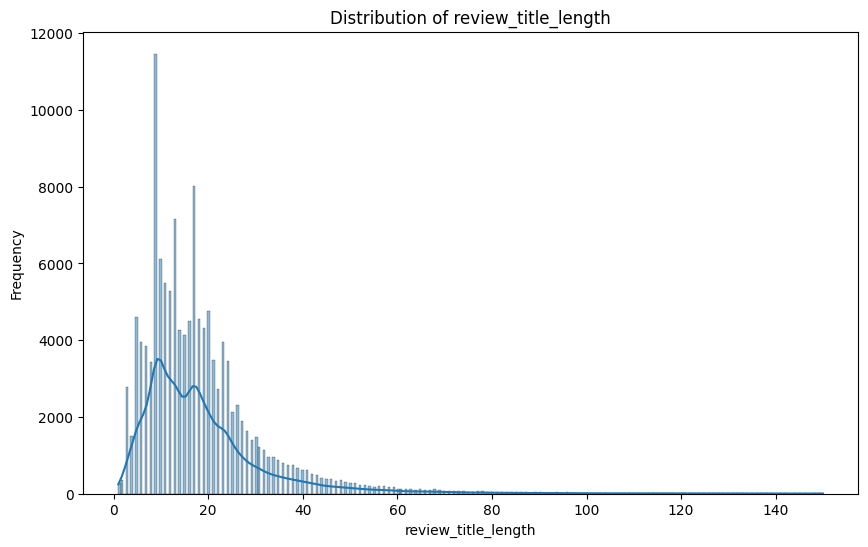

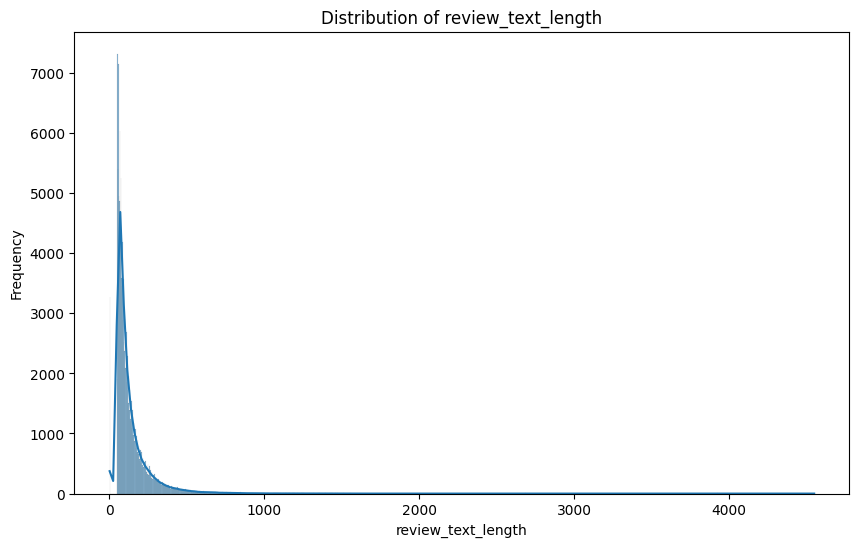

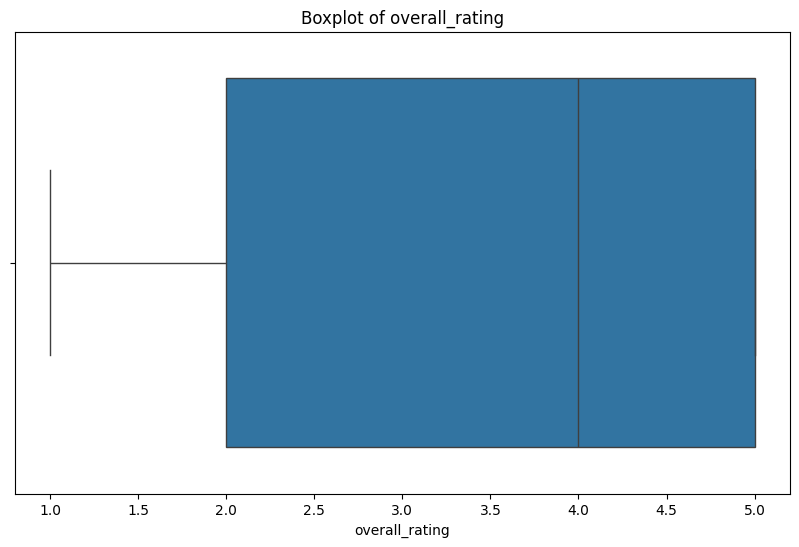

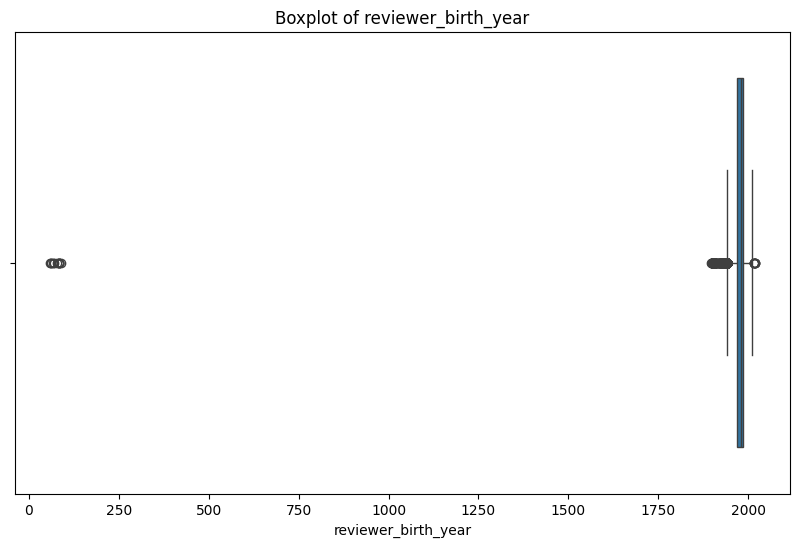

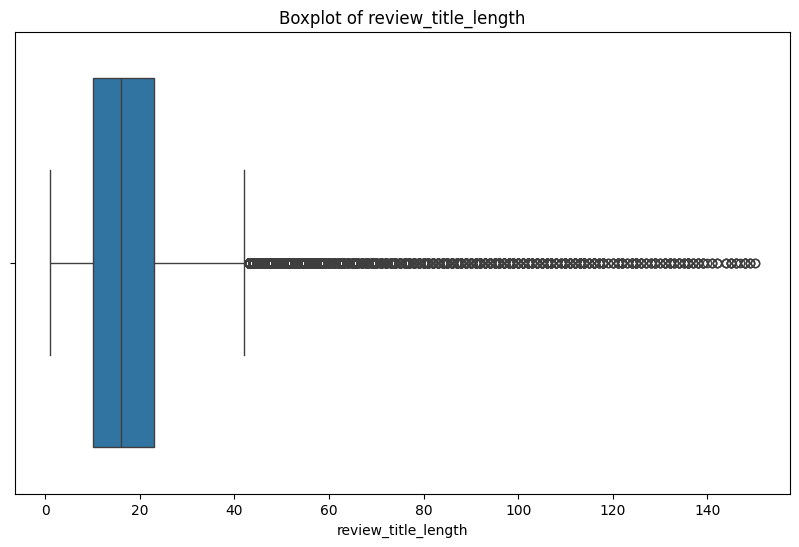

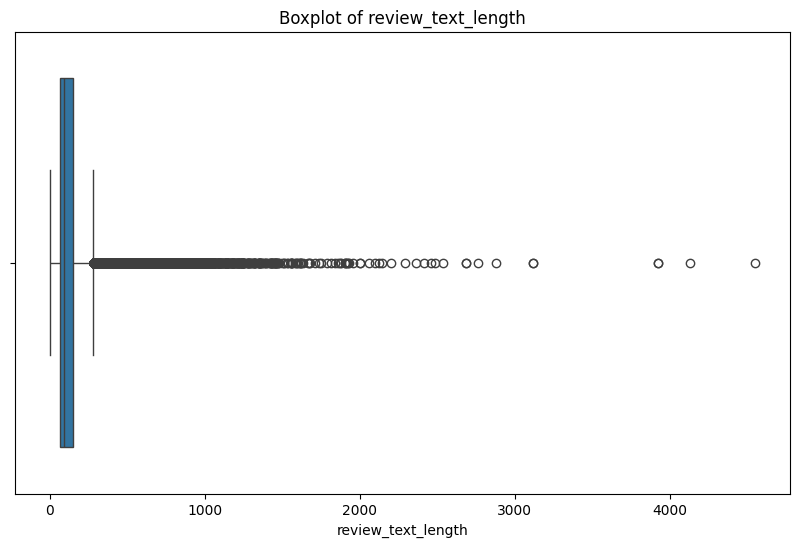

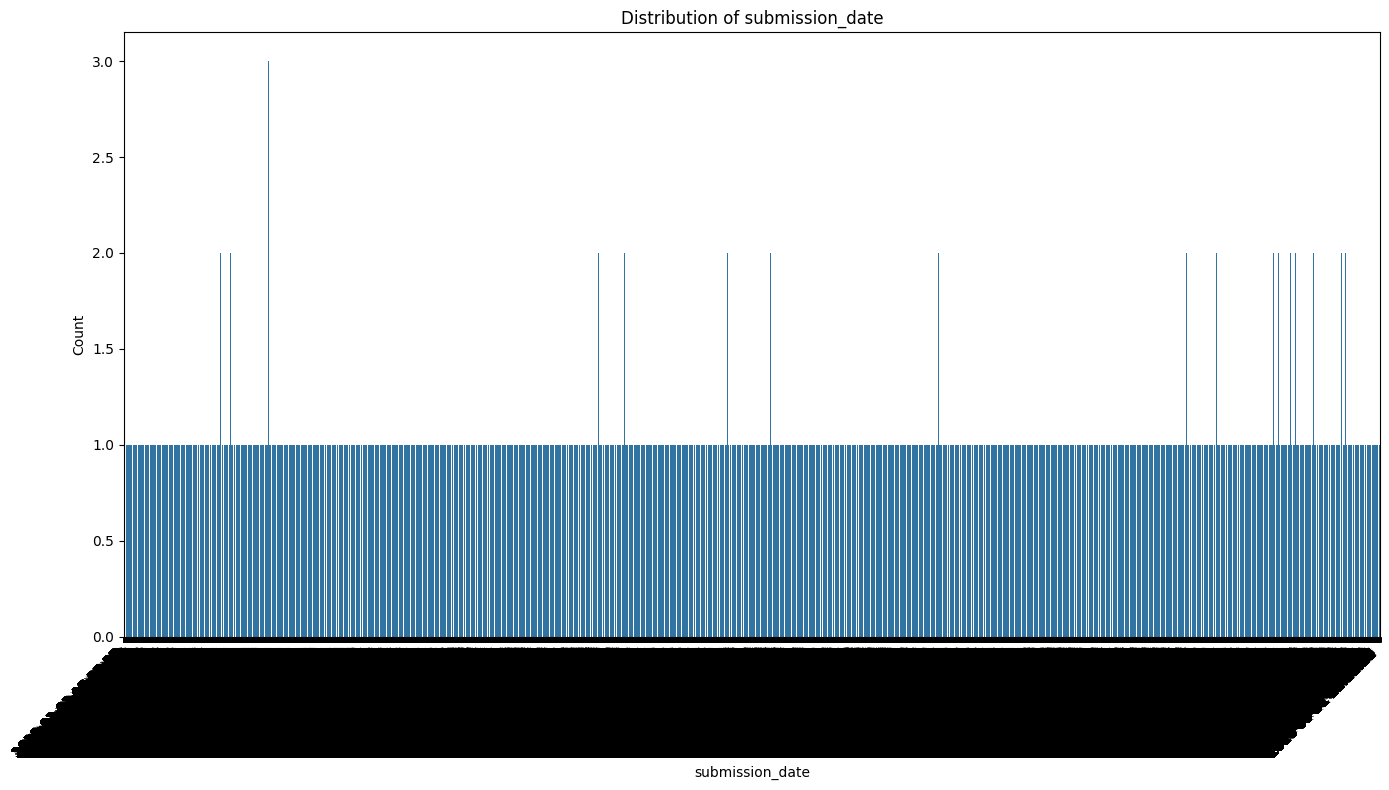

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overall rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='overall_rating', data=df)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

# Histograms for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# Count plots for categorical features (excluding text columns)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col not in ['review_title', 'review_text']:
        plt.figure(figsize=(14, 8))
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Correlation matrix and heatmap - handle non-numeric columns
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()